# Stores Sales Prediction

In [1]:
import logging
logging.basicConfig(filename="log_file.txt",level=logging.INFO, format="%(asctime)s:%(levelname)s:%(message)s", 
                    datefmt="%d/%m/%Y %I:%M:%S %p")

# Importing Libraries

In [2]:
logging.info("Importing Libraries")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
logging.info("Importing libraries Successful")

# Importing Training Dataset

In [3]:
logging.info("Reading Train CSV file")
train_data = pd.read_csv("Train.csv")
logging.info("Reading CSV file Successful")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
logging.info("Printing the data")
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
logging.info("Dropping Item Identifier column from the train_data")
train_data.drop('Item_Identifier',axis=1, inplace=True)
logging.info("Dropping Item Identifier Successful")

In [7]:
train_data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
logging.info("Printing All columns name present in the train_data")
train_data.columns
logging.info("Printing All columns name Successful")

In [9]:
logging.info("Printing train_data information")
train_data.info()
logging.info("Printing train_data information Successful")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [10]:
logging.info("Checking null values")
train_data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

# EDA for Train data

In [13]:
logging.info("Caluculating mean of Item type with respect to Item weight")
train_data.groupby("Item_Type")["Item_Weight"].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [14]:
logging.info("Filling the null Values of Item weight")
try:
    mean = train_data.groupby('Item_Type')['Item_Weight'].mean()
    for i in range(len(mean)):
        c1 = (train_data['Item_Type']==mean.index[i])&(train_data['Item_Weight'].isna()==True)
        train_data['Item_Weight'] = np.select([c1], [mean[i]], train_data['Item_Weight'])
except ValueError as val:
    print("Value Error")
    logging.exception(val)
except KeyError as key:
    print("Key Error")
    logging.exception(key)
logging.info("Successful")

In [15]:
from statistics import mode
logging.info("Filling null values of Outlet size")
try:
    train_data['Outlet_Size'].fillna(mode(train_data['Outlet_Size']),inplace=True)
except ValueError as val:
    print("Value Error")
    logging.exception(val)
except KeyError as key:
    print("Key Error")
    logging.exception(key)
logging.info("Successful")

In [16]:
logging.info("Replacing the values of Item fat content")
fat_content = {"low fat": "Low Fat",
               "LF": "Low Fat",
               "reg":"Regular"}
train_data["Item_Fat_Content"]= train_data["Item_Fat_Content"].replace(fat_content)
logging.info("Successful")

In [17]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [18]:
train_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Visualization

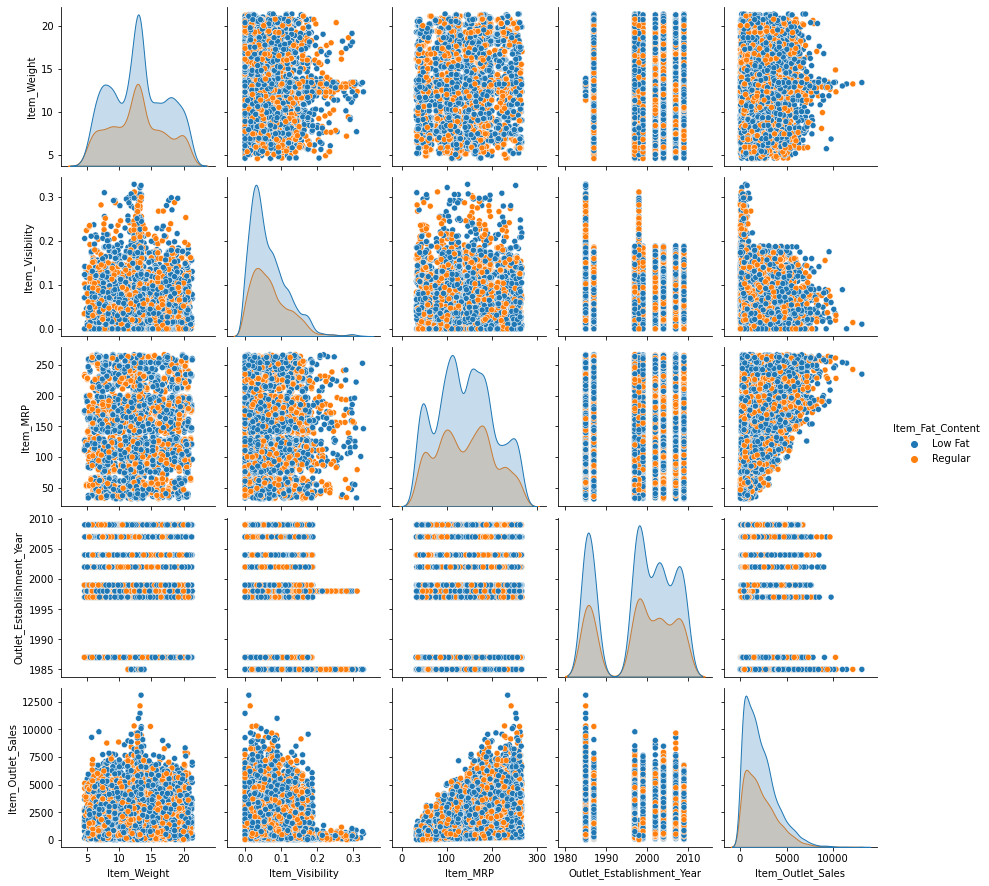

In [19]:
logging.info("Plotting pairplot of train_data")
sns.pairplot(train_data, hue = "Item_Fat_Content")
logging.info("Plotting pairplot of train_data Successful")

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


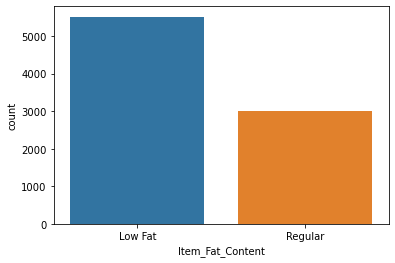

In [20]:
logging.info("Plotting countplot of Item fat content")
sns.countplot(train_data['Item_Fat_Content'])
logging.info("Plotting countplot of Item fat content successful")

C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


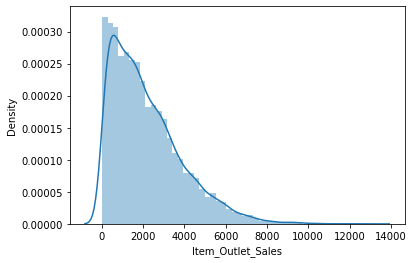

In [21]:
logging.info("Plotting distplot of Item outlet sales")
sns.distplot(train_data['Item_Outlet_Sales'])
logging.info("Plotting distplot of Item outlet sales successful")

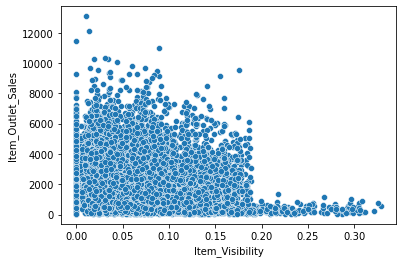

In [22]:
logging.info("Plotting scatterplot")
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train_data)
logging.info("Plotting scatterplot successful")

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


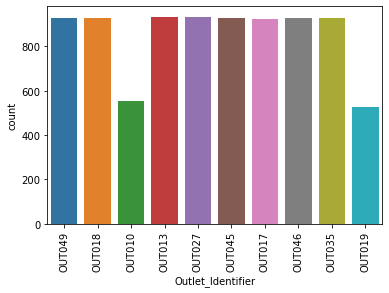

In [23]:
logging.info("Plotting countplot of outlet identifier")
sns.countplot(train_data['Outlet_Identifier'])
plt.xticks(rotation = 90)
plt.show()
logging.info("Plotting countplot of outlet identifier successful")

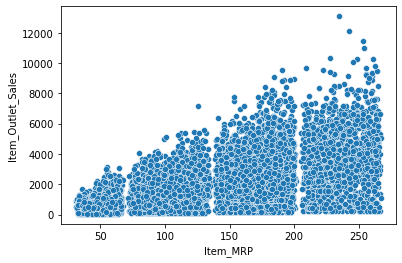

In [24]:
logging.info("Plotting scatterplot of item MRP with respect to Item outlet sales")
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=train_data)
logging.info("Successful")

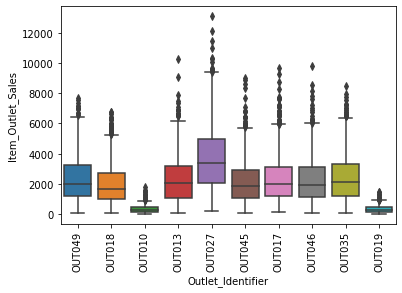

In [25]:
logging.info("Plotting boxplot")
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data =train_data)
plt.xticks(rotation = 90)
plt.show()
logging.info("Plotting boxplot successful")

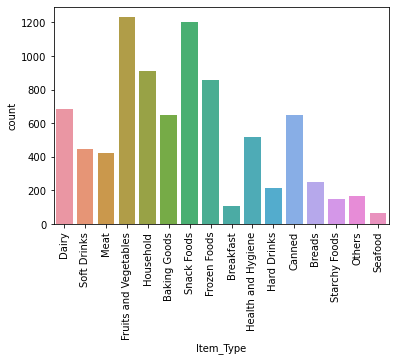

In [26]:
logging.info("Plotting countplot of Item type")
sns.countplot(x='Item_Type',data=train_data)
plt.xticks(rotation = 90)
plt.show()
logging.info("Plotting countplot of Item type successful")

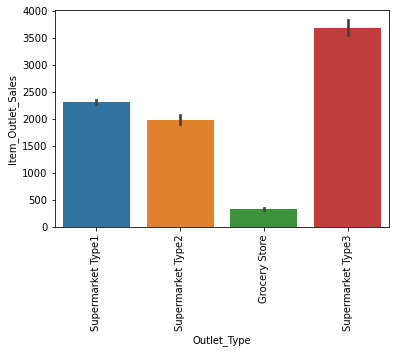

In [27]:
logging.info("Plotting barplot")
sns.barplot(y='Item_Outlet_Sales',x='Outlet_Type',data=train_data)
plt.xticks(rotation = 90)
plt.show()
logging.info("Plotting barplot successful")

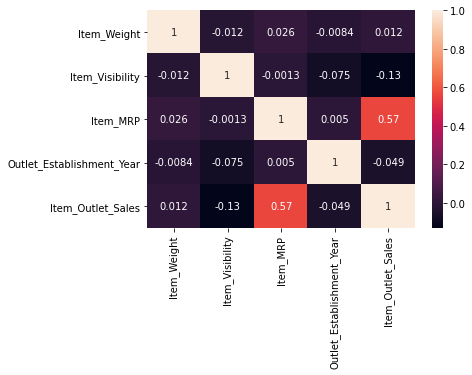

In [28]:
logging.info("Plotting train_data correlation")
sns.heatmap(train_data.corr(),annot=True)
logging.info("Plotting train_data correlation successful")

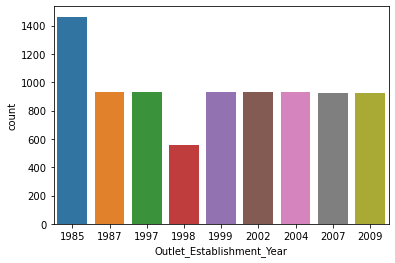

In [29]:
logging.info("Plotting countplot of outlet establishment year")
sns.countplot(x="Outlet_Establishment_Year", data = train_data)
logging.info("Successful")

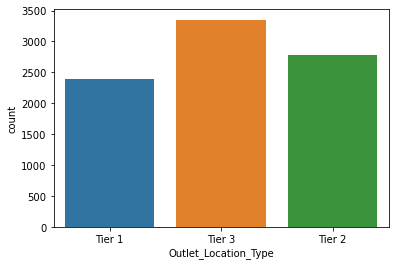

In [30]:
logging.info("Plotting countplot of outlet location type")
sns.countplot(x="Outlet_Location_Type", data = train_data)
logging.info("Successful")

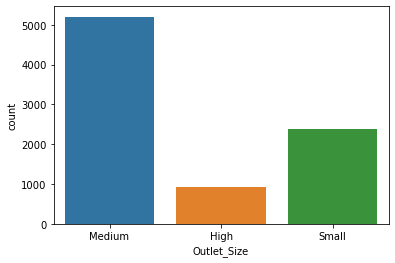

In [31]:
logging.info("Plotting countplot of outlet size")
sns.countplot(x="Outlet_Size", data = train_data)
logging.info("Successful")

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
logging.info("Applying label encoding to Item type and Outlet identifier")
try:
    cols = ['Item_Type', 'Outlet_Identifier',]
    for i in cols:
        train_data[i] = le.fit_transform(train_data[i])
except ValueError as val:
    print("Value Error")
    logging.exception(val)
except KeyError as key:
    print("Key Error")
    logging.exception(key)
except NameError as name:
    print("Name Error")
    logging.exception(name)
logging.info("Successful")

In [33]:
train_data['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [34]:
train_data['Outlet_Identifier'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [35]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
logging.info("Label encoding to Item fat content")
train_data.replace({"Low Fat":0, "Regular":1}, inplace=True)
logging.info("Successful")

In [37]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
train_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [39]:
logging.info("Label encoding to outlet size")
train_data.replace({"Small":0, "Medium":1, "High":2}, inplace=True)
logging.info("Label encoding successful")

In [40]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,1,Tier 3,Grocery Store,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,2,Tier 3,Supermarket Type1,994.7052


In [41]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [42]:
logging.info("Label encoding to outlet location type")
train_data.replace({"Tier 1":0, "Tier 2":1, "Tier 3":2}, inplace=True)
logging.info("Label encoding successful")

In [43]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [44]:
logging.info("Label encoding to outlet type")
train_data.replace({"Grocery Store":0, "Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3":3}, inplace=True)
logging.info("Label encoding successful")

In [45]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,2,2,1,994.7052


# Importing Test Dataset

In [46]:
logging.info("Reading test CSV file")
test_data = pd.read_csv("Test.csv")
logging.info("Reading test CSV file successful")

In [47]:
pd.set_option("display.max_columns",None)

In [48]:
logging.info("Printing test data")
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [49]:
logging.info("Dropping item identifier from test_data")
test_data.drop('Item_Identifier', axis=1, inplace=True)
logging.info("Dropping item identifier successful")

In [50]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [51]:
logging.info("Printing all test_data columns")
test_data.columns
logging.info("Printing successful")

In [52]:
logging.info("Printing test_data information")
test_data.info()
logging.info("Printing successful")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                4075 non-null   object 
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


In [53]:
logging.info("Checking the null values")
test_data.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# EDA for Test Data

In [54]:
logging.info("Calculating mean value for item type of test_data")
test_data.groupby("Item_Type")["Item_Weight"].mean()
logging.info("Successful")

In [55]:
logging.info("Filling the null Values of Item weight")
try:
    mean = test_data.groupby('Item_Type')['Item_Weight'].mean()
    for i in range(len(mean)):
        c1 = (test_data['Item_Type']==mean.index[i])&(test_data['Item_Weight'].isna()==True)
        test_data['Item_Weight'] = np.select([c1], [mean[i]], test_data['Item_Weight'])
except ValueError as val:
    print("Value Error")
    logging.exception(val)
except KeyError as key:
    print("Key Error")
    logging.exception(key)
logging.info("Successful")

In [56]:
from statistics import mode
logging.info("Filling null values of Outlet size")
try:
    test_data['Outlet_Size'].fillna(mode(test_data['Outlet_Size']),inplace=True)
except ValueError as val:
    print("Value Error")
    logging.exception(val)
except KeyError as key:
    print("Key Error")
    logging.exception(key)
logging.info("Successful")

In [57]:
logging.info("Replacing the values of Item fat content")
fat_content = {"low fat": "Low Fat",
               "LF": "Low Fat",
               "reg":"Regular"}
test_data["Item_Fat_Content"]= test_data["Item_Fat_Content"].replace(fat_content)
logging.info("Successful")

In [58]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [59]:
test_data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
logging.info("Applying label encoding to Item type and Outlet identifier")
try:
    cols = ['Item_Type', 'Outlet_Identifier',]
    for i in cols:
        test_data[i] = le.fit_transform(test_data[i])
except ValueError as val:
    print("Value Error")
    logging.exception(val)
except KeyError as key:
    print("Key Error")
    logging.exception(key)
except NameError as name:
    print("Name Error")
    logging.exception(name)
logging.info("Successful")

In [61]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [62]:
logging.info("Label encoding to Item fat content")
test_data.replace({"Low Fat":0, "Regular":1}, inplace=True)
logging.info("Successful")

In [63]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75000,0,0.007565,13,107.8622,9,1999,Medium,Tier 1,Supermarket Type1
1,8.30000,1,0.038428,4,87.3198,2,2007,Medium,Tier 2,Supermarket Type1
2,14.60000,0,0.099575,11,241.7538,0,1998,Medium,Tier 3,Grocery Store
3,7.31500,0,0.015388,13,155.0340,2,2007,Medium,Tier 2,Supermarket Type1
4,12.95504,1,0.118599,4,234.2300,5,1985,Medium,Tier 3,Supermarket Type3


In [64]:
test_data['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [65]:
logging.info("Label encoding to outlet size")
test_data.replace({"Small":0, "Medium":1, "High":2}, inplace=True)
logging.info("Label encoding successful")

In [66]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75000,0,0.007565,13,107.8622,9,1999,1,Tier 1,Supermarket Type1
1,8.30000,1,0.038428,4,87.3198,2,2007,1,Tier 2,Supermarket Type1
2,14.60000,0,0.099575,11,241.7538,0,1998,1,Tier 3,Grocery Store
3,7.31500,0,0.015388,13,155.0340,2,2007,1,Tier 2,Supermarket Type1
4,12.95504,1,0.118599,4,234.2300,5,1985,1,Tier 3,Supermarket Type3


In [67]:
test_data['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

In [68]:
logging.info("Label encoding to outlet location type")
test_data.replace({"Tier 1":0, "Tier 2":1, "Tier 3":2}, inplace=True)
logging.info("Label encoding successful")

In [69]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75000,0,0.007565,13,107.8622,9,1999,1,0,Supermarket Type1
1,8.30000,1,0.038428,4,87.3198,2,2007,1,1,Supermarket Type1
2,14.60000,0,0.099575,11,241.7538,0,1998,1,2,Grocery Store
3,7.31500,0,0.015388,13,155.0340,2,2007,1,1,Supermarket Type1
4,12.95504,1,0.118599,4,234.2300,5,1985,1,2,Supermarket Type3


In [70]:
test_data['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [71]:
logging.info("Label encoding to outlet type")
test_data.replace({"Grocery Store":0, "Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3":3}, inplace=True)
logging.info("Label encoding successful")

In [72]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75000,0,0.007565,13,107.8622,9,1999,1,0,1
1,8.30000,1,0.038428,4,87.3198,2,2007,1,1,1
2,14.60000,0,0.099575,11,241.7538,0,1998,1,2,0
3,7.31500,0,0.015388,13,155.0340,2,2007,1,1,1
4,12.95504,1,0.118599,4,234.2300,5,1985,1,2,3


# Feature Selection

In [73]:
logging.info("Feature Selection")
X = train_data.iloc[:,:10]
y = train_data.iloc[:,-1]
logging.info("Feature Selection successful")

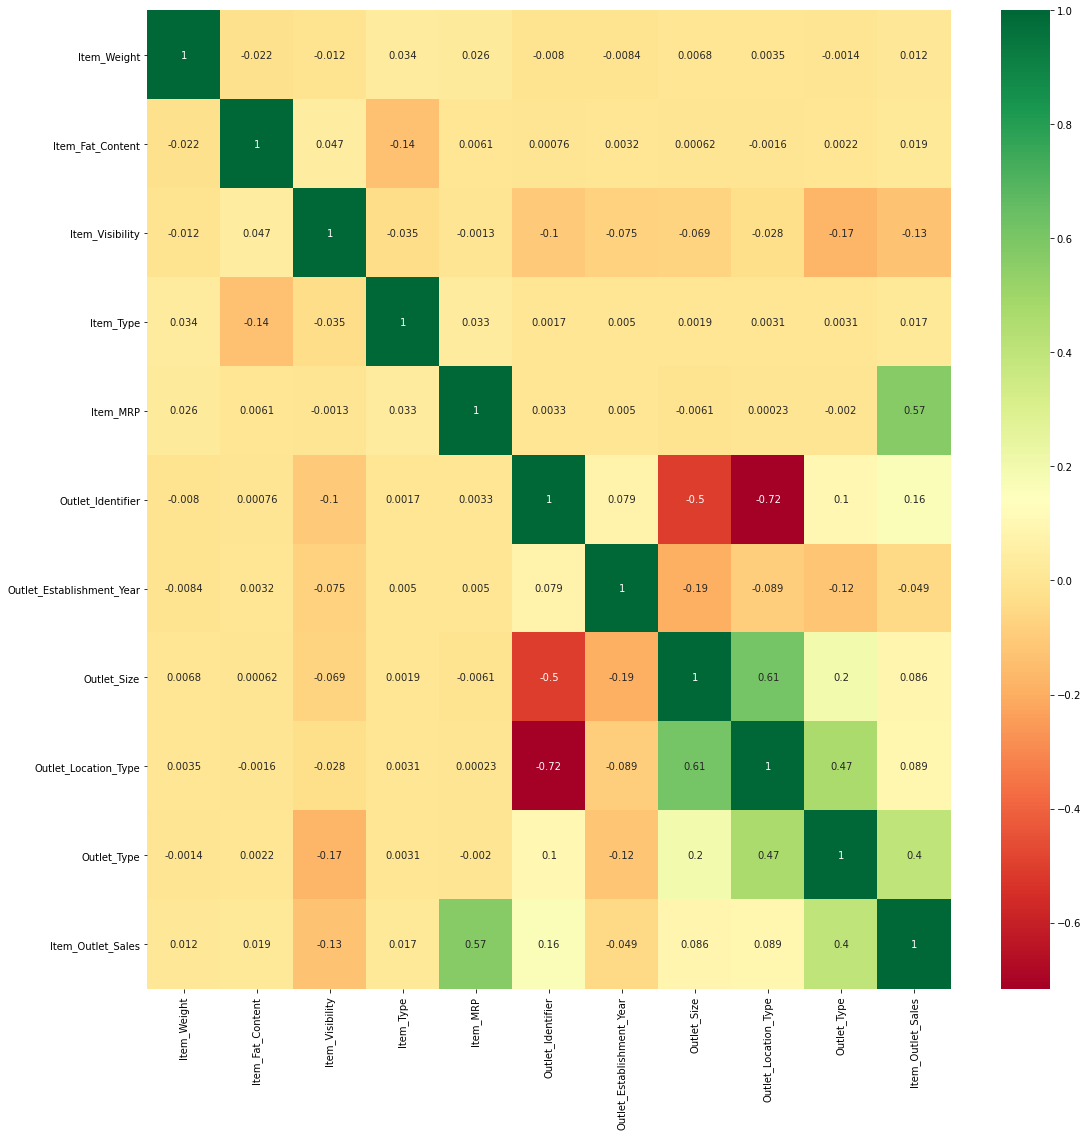

In [74]:
logging.info("Plotting train_data correlation heatmap")
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()
logging.info("Plotting successful")

In [75]:
# Important feature using ExtraTreesRegressor
logging.info("Checking important feature")
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [76]:
print(selection.feature_importances_)
logging.info("Checking important feature Successful")

[0.0768768  0.0197507  0.09059361 0.06386356 0.43046321 0.02856565
 0.02847957 0.01236409 0.01092515 0.23811766]


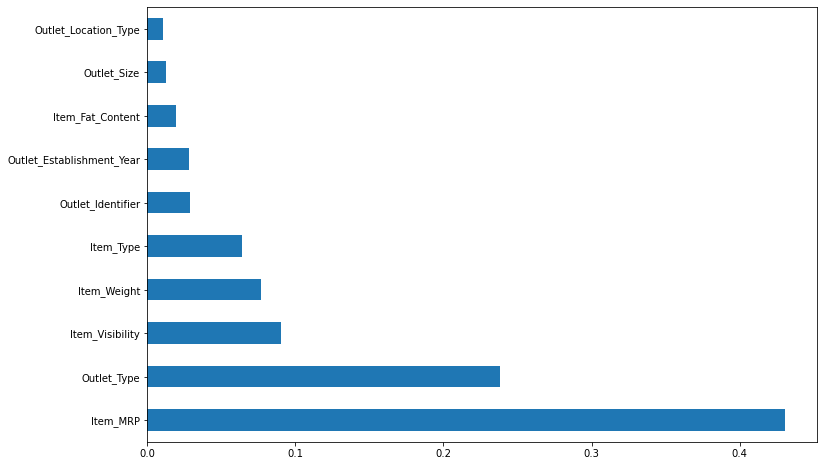

In [77]:
#plot graph of feature importances for better visualization
logging.info("Plotting graph of feature importance")
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
logging.info("Plotting graph of feature importance Successful")

# Model Building

In [78]:
logging.info("Splitting the data into Train and test")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
logging.info("Successful")

In [79]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
6404,13.224769,0,0.008722,6,123.5414,5,1985,1,2,3
5820,18.700000,0,0.014623,14,52.0324,7,2002,1,1,1
48,15.850000,1,0.121633,0,60.6220,8,1997,0,0,1
4583,12.867061,0,0.145670,5,247.2776,4,1985,0,0,0
3791,21.000000,0,0.049296,13,194.4478,6,2004,0,1,1


In [80]:
y_train.head()

6404    4508.1318
5820    1090.5804
48      2576.6460
4583     743.0328
3791     968.7390
Name: Item_Outlet_Sales, dtype: float64

In [81]:
X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,14.50000,0,0.089960,8,159.5604,7,2002,1,1,1
4148,12.98788,0,0.009535,13,64.5510,5,1985,1,2,3
7423,11.50000,0,0.017742,8,129.6626,2,2007,1,1,1
4836,10.19500,0,0.000000,5,143.1154,2,2007,1,1,1
944,21.00000,0,0.049264,13,195.0478,1,1987,2,2,1


In [82]:
y_test.head()

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
Name: Item_Outlet_Sales, dtype: float64

# Fitting Model Using Linear Regression

In [83]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [84]:
from sklearn.linear_model import LinearRegression
logging.info("Fitting Model Using Linear Regression")
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("R2 score: ",r2_score(y_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
logging.info("Successful")

R2 score:  0.5129696687890513
Mean absolute error:  910.2973694176812
Mean squared error:  1425469.3287264486


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


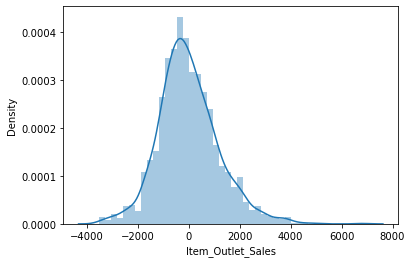

In [85]:
sns.distplot(y_test-y_pred)
plt.show()

# Fitting Model Using ExtraTree Regression

In [86]:
from sklearn.ensemble import ExtraTreesRegressor
logging.info("Fitting Model Using ExtraTree Regression")
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print("R2 score: ",r2_score(y_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
logging.info("Successful")

R2 score:  0.5375714598593271
Mean absolute error:  823.5584125008797
Mean squared error:  1353463.3439755219


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


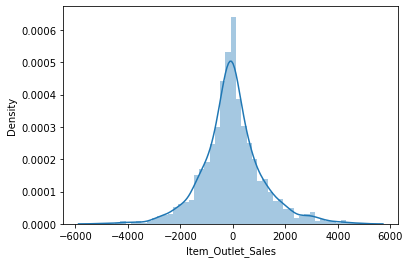

In [87]:
sns.distplot(y_test-y_pred)
plt.show()

# Fitting Model Using Gradient Boosting Regression

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
logging.info("Fitting Model Using Gradient Boosting Regression")
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print("R2 score: ",r2_score(y_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
logging.info("Successful")

R2 score:  0.5945129602918954
Mean absolute error:  773.4423505954005
Mean squared error:  1186803.5751753456


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


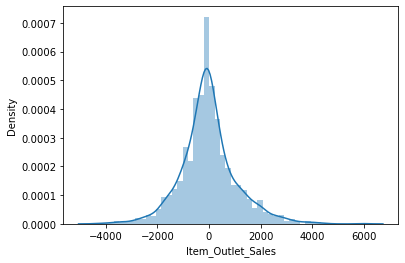

In [89]:
sns.distplot(y_test-y_pred)
plt.show()

# Fitting Model Using Random Forest Regression

In [90]:
from sklearn.ensemble import RandomForestRegressor
logging.info("Fitting Model Using Random Forest Regression")
rfr = RandomForestRegressor(n_estimators=300,criterion='mae',max_depth=300,max_features='log2',random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print("R2 score: ",r2_score(y_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
logging.info("Successful")

R2 score:  0.5790044791719733
Mean absolute error:  788.7569384629521
Mean squared error:  1232194.7197404404


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


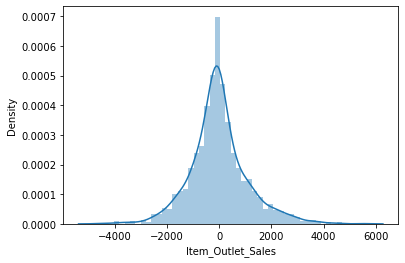

In [91]:
sns.distplot(y_test-y_pred)
plt.show()

# Fitting Model Using XGBoost Regression

In [92]:
from xgboost import XGBRFRegressor
logging.info("Fitting Model Using XGBoost Regression")
xgb = XGBRFRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("R2 score: ",r2_score(y_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
logging.info("Successful")

R2 score:  0.5940953912631177
Mean absolute error:  772.1723535912942
Mean squared error:  1188025.7410344381


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


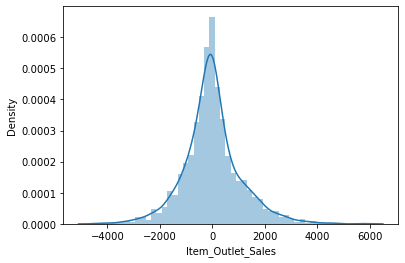

In [93]:
sns.distplot(y_test-y_pred)
plt.show()

# Fitting Model Using Kneighbors Regression

In [94]:
from sklearn.neighbors import KNeighborsRegressor
logging.info("Fitting Model Using Kneighbors Regression")
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("R2 score: ",r2_score(y_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test, y_pred))
print("Mean squared error: ",mean_squared_error(y_test, y_pred))
logging.info("Successful")

R2 score:  0.5141884511824548
Mean absolute error:  847.4753816304985
Mean squared error:  1421902.1239573557


C:\Users\prash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


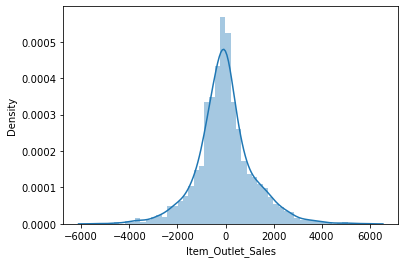

In [95]:
sns.distplot(y_test-y_pred)
plt.show()

# Save the model

In [100]:
logging.info("Saving the model")
import pickle

file = open(r'C:\Users\prash\Desktop\data\Stores Sales Prediction\Stores_Sales.pkl', 'wb')

# dump information to that file
pickle.dump(gbr, file)
file.close()
logging.info("Successful")

# Prediction

In [101]:
logging.info("Predicting on test data")
data = np.array([[9.300,0,0.016047,4,249.8092,9,1999,1,0,1]])
prediction = gbr.predict(data)
print(prediction)
logging.info("Prediction successful")

[4103.53632189]


In [102]:
data = np.array([[5.920,1,0.019278,14,48.2692,3,2009,1,2,2]])
prediction = gbr.predict(data)
print(prediction)

[619.56368255]


In [103]:
data = np.array([[5.920,1,0.019278,14,48.2692,3,2009,1,2,2]])
model = pickle.load(open(r'C:\Users\prash\Desktop\data\Stores Sales Prediction\Stores_Sales.pkl','rb'))
prediction = model.predict(data)
print(prediction)

[619.56368255]
